In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
img_ = cv2.imread("../me.jpg")
img_ = cv2.cvtColor(img_,2)
img_ = cv2.resize(img_,(400,400))
img_gray = cv2.cvtColor(img_,cv2.COLOR_BGR2GRAY)

In [3]:
def drawing(img,title ="title"):
    plt.style.use("seaborn")
    plt.imshow(img,cmap="gray")
    plt.axis("off")
    plt.title(title+str(img.shape))
    plt.show()

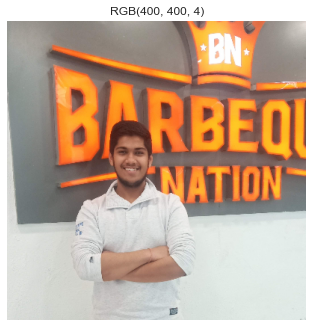

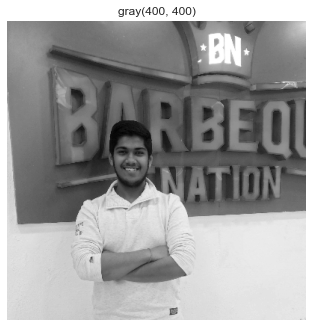

In [4]:
drawing(img_,"RGB")
drawing(img_gray,"gray")

In [5]:
## Hardcoded filter

def convolution(img,img_filter):
    W = img.shape[0]
    H = img.shape[1]
    F = img_filter.shape[0] #3
    new_img = np.zeros((W-F+1,H-F+1))
    for row in range(W-F+1):
        for col in range(H-F+1):      ## First two loop iterating on image
            for i in range(F):
                for j in range(F):    ## Last two loop for iterating over filter
                    new_img[row][col] += (img[row+i][col+j]*img_filter[i][j])
                if new_img[row][col]>255:
                    new_img[row][col] = 255
                if new_img[row][col]<0:
                    new_img[row][col] = 0
    return new_img ##Activation map

In [6]:
blur_filter = np.ones((3,3))/9.0

In [7]:
print(blur_filter)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [8]:
output = convolution(img_gray,blur_filter)

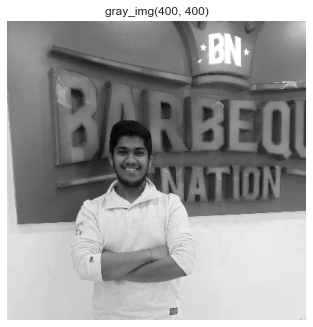

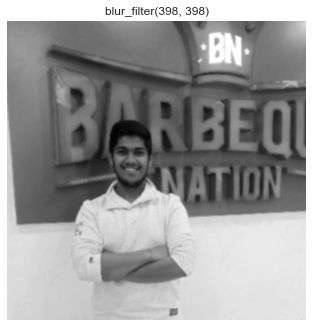

In [9]:
drawing(img_gray,"gray_img")
drawing(output,"blur_filter")

In [10]:
edge_filter = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
output1 = convolution(img_gray,edge_filter)

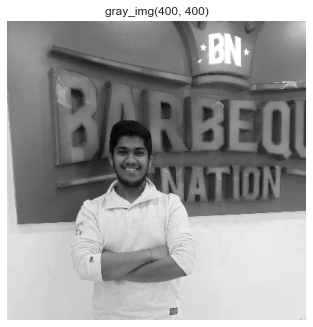

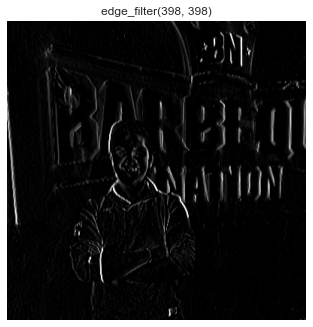

In [11]:
drawing(img_gray,"gray_img")
drawing(output1,"edge_filter")

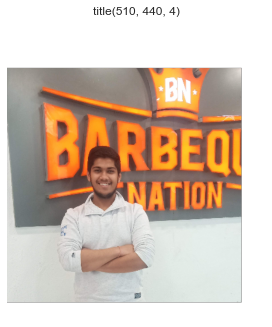

In [16]:
# padding 
pad_img = np.pad(img_,((80,30),(0,40),(0,0)),"constant",constant_values =0)
drawing(pad_img)

#### Implement Pooling Operation

In [19]:
X = np.array([[1,0,2,3],
            [4,6,6,8],
            [3,1,1,0],
            [1,2,2,4]])

In [41]:
def pooling(X,mode = "max"):
    stride = 2
    f = 2
    H,W = X.shape
    HO = int((H-f)/stride)+1
    WO = int((W-f)/stride)+1
    output = np.zeros((HO,WO))
#     print(output.shape)
    for r in range(HO):
        for c in range(WO):
            r_start = r*stride
            r_end = r_start + f
            c_start = c*stride
            c_end = c_start + f
            
            X_slice = X[r_start : r_end,c_start:c_end]
#             print(X_slice)
#             print(np.max(X_slice))
            if mode == "max":
                output[r][c] = np.max(X_slice)
            else :
                output[r][c] = np.mean(X_slice)
    return output 

In [43]:
##Max pooling
pooling(X,"max")

array([[6., 8.],
       [3., 4.]])

In [44]:
##Avg ppoling
pooling(X,"avg")

array([[2.75, 4.75],
       [1.75, 1.75]])